<a href="https://colab.research.google.com/github/mrezaadi/DQLAB-Note/blob/main/Google%20Colab/DQLAB_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())
dataset

**LIBRARY DATETIME**

Ada beberapa function yang berperan
1. apply & lambda biasa digunakan untuk membuat kolom baru, 
berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) 
berarti setiap input x di dalam kolom, akan diubah menjadi x*2). 
Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja

2. Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.

3. Function  strftime digunakan untuk mengubah format suatu data bertime datetime, 
dalam hal ini diubah menjadi '%Y-%m', yang berarti outputnya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada. 

In [ ]:
#Membuat GMV demgan menggunakan library datetime

#Membuat kolom month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

#Membuat kolom gmv dengn cara mengkalikan item price dengan quanitity
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n'% dataset.shape)
print('Lima data teratas:')
print(dataset.head())

**MEMBUAT AGREGAT**

In [ ]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

**MATPLOTLIB**

In [ ]:
import matplotlib.pyplot as plt

plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()
#Cara pendekatan lain
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

**FIGURE MATPLOTLIB**

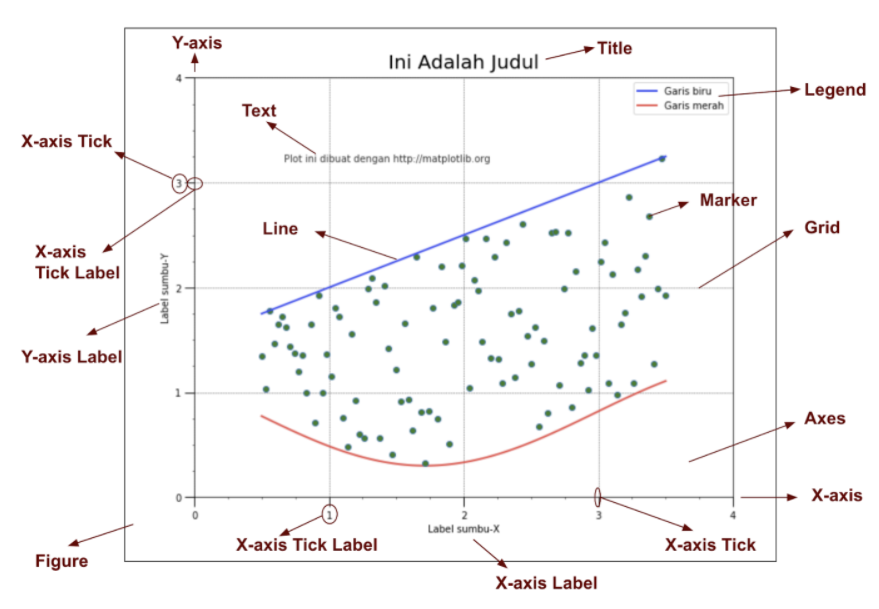

* Figure adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.
* Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari beberapa Axes. 
* Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-axis). * Masing-masing sumbu memiliki komponen sebagai berikut:
 * Axis Label: Nama dari sumbu yang ditampilkan.
 * Tick: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
 * Tick Label: Tulisan di tiap tick yang menyatakan nilainya.
* Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), atau marker (untuk scatter plot), bisa juga bentuk lain seperti bar (untuk bar plot / histogram).
* Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk mempermudah melihat tick yang sejajar, dan Text untuk memberikan informasi tambahan berbentuk teks di grafik.




**KUSTOMISASI TITTLE DAN AXIS LABEL**
* loc: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka defaultnya title ada di tengah.
* pad: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
* fontsize: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
* color: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.

**KUSTOMISASI LINE DAN POINT**
* color: mengubah warnanya (sama seperti di title)
* linewidth: mengubah ketebalan line/garisnya (dalam satuan px)
* linestyle: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
* marker: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.


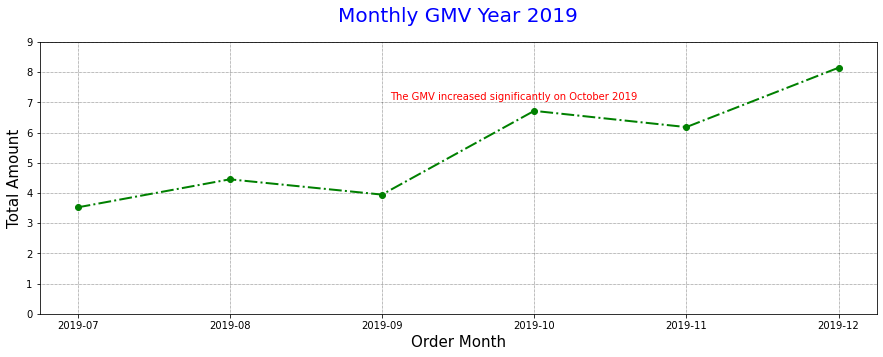

In [30]:
#Saran ubah fgsize terlebih dahulu agar komponen lain tidak berubah
fig = plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center',pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='black', linestyle=':', linewidth=0.5) #Kustomisasi Grid
plt.ylim(ymin=0) #Batas minimun Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int)) #Kustomisasi Axis Ticks
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform= fig.transFigure, color='red') #Menambahkah informasi pada plot
plt.savefig('monthly_gmv.png', quality=95) #Menyimpan gambar dengan kulitas 95% dari aslinya
plt.show()

In [ ]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()